In [1]:
import fdtd
import numpy as np
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
fdtd.set_backend("numpy")

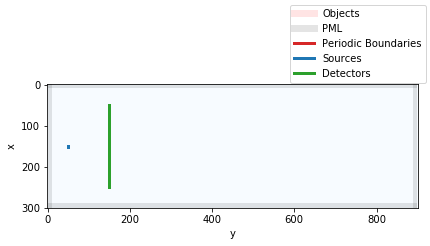

In [4]:
# make Grid
grid = fdtd.Grid(
    shape = (300, 900, 1), # 30µm x 30µm x 1 (grid_spacing) --> 2D FDTD
    grid_spacing = 1e-7, # 100nm "pixel" size
    permittivity = 1,
)


# add Source
# grid[50:250, 50, 0] = fdtd.LineSource(period = 1550e-9 / (3e8), name="source")
grid[150:152, 50, 0] = fdtd.LineSource(period = 1550e-9 / (3e8), name="source", power=100)
grid[50:250, 150, 0] = fdtd.LineDetector(name="detector")


# add PML boundaries

# x boundaries
# grid[0, :, :] = fdtd.PeriodicBoundary(name="xbounds")
grid[0:10, :, :] = fdtd.PML(name="pml_xlow")
grid[-10:, :, :] = fdtd.PML(name="pml_xhigh")

# y boundaries
# grid[:, 0, :] = fdtd.PeriodicBoundary(name="ybounds")
grid[:, 0:10, :] = fdtd.PML(name="pml_ylow")
grid[:, -10:, :] = fdtd.PML(name="pml_yhigh")
grid.visualize(z=0)

100%|██████████| 500/500 [00:12<00:00, 41.01it/s]


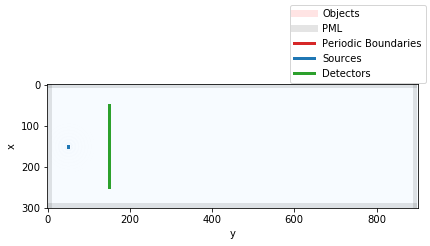

In [5]:
grid.reset()
grid.run(total_time=500)
grid.visualize(z=0)

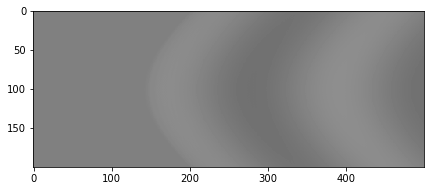

In [21]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(np.stack(grid.detector.E)[:,:,2].T, vmin=-0.5, vmax=0.5, cmap='gray')

In [22]:
grid

Grid(shape=(300,900,1), grid_spacing=1.00e-08, courant_number=0.70)

In [23]:
s = grid.sources[0]
vars(s)

{'grid': Grid(shape=(300,900,1), grid_spacing=1.00e-08, courant_number=0.70),
 'period': 221,
 'power': 100,
 'phase_shift': 0.0,
 'name': 'source',
 'x': [150, 151],
 'y': [50, 50],
 'z': [0, 0],
 'vect': array([1., 0.]),
 'profile': array([1.19202922, 8.80797078])}